In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# 1.1
miu_zero = [-1, 1]
miu_one = [-2.5, 2.5]
miu_two = [-4.5, 4.5]

sigma = [1, 1]
samples = np.zeros([700, 3])
for i in range(700):
    miu_index = 0
    rand_index = np.random.rand()
    if rand_index >= 2/3:
        miu_index = 2
        sample = np.random.normal(miu_two, sigma)
    elif 1/3 < rand_index < 2/3:
        miu_index = 1
        sample = np.random.normal(miu_one, sigma)
    else:
        sample = np.random.normal(miu_zero, sigma)

    samples[i] = [sample[0], sample[1], miu_index]

In [4]:
# 1.2
data = pd.DataFrame(samples, columns = ['x','y','label'])

miu_zero_df = data[data['label'] == 0]
miu_one_df = data[data['label'] == 1]
miu_two_df = data[data['label'] == 2]

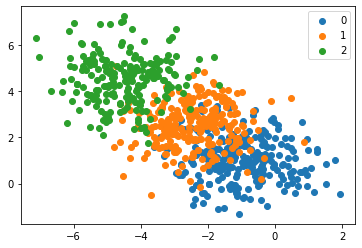

In [5]:
plt.scatter(x=miu_zero_df['x'], y=miu_zero_df['y'], label='0')
plt.scatter(x=miu_one_df['x'], y=miu_one_df['y'], label='1')
plt.scatter(x=miu_two_df['x'], y=miu_two_df['y'], label='2')
plt.legend()

In [6]:
# 1.3
test_samples = np.zeros([300, 3])
for i in range(300):
    miu_index = 0
    rand_index = np.random.rand()
    if rand_index >= 2/3:
        miu_index = 2
        sample = np.random.normal(miu_two, sigma)
    elif 1/3 < rand_index < 2/3:
        miu_index = 1
        sample = np.random.normal(miu_one, sigma)
    else:
        sample = np.random.normal(miu_zero, sigma)

    test_samples[i] = [sample[0], sample[1], miu_index]
test_data = pd.DataFrame(test_samples, columns=['x', 'y', 'label'])

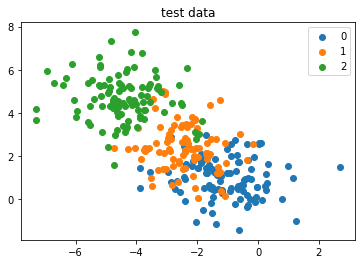

In [7]:
miu_zero_df = test_data[test_data['label'] == 0]
miu_one_df = test_data[test_data['label'] == 1]
miu_two_df = test_data[test_data['label'] == 2]

plt.scatter(x=miu_zero_df['x'], y=miu_zero_df['y'], label='0')
plt.scatter(x=miu_one_df['x'], y=miu_one_df['y'], label='1')
plt.scatter(x=miu_two_df['x'], y=miu_two_df['y'], label='2')
plt.legend()
plt.title('test data')

plt.show()

4.

In [8]:
# 1.4
k = 1
x_cols = ['x', 'y']
y_cols = 'label'
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X=data[x_cols], y=data[y_cols])
y_train_pred = model.predict(X=data[x_cols])
y_test_pred = model.predict(X=test_data[x_cols])

y_train_true = data[y_cols].values
y_test_true = test_data[y_cols].values
train_error = np.sum(y_train_pred != y_train_true) / len(y_train_true)
test_error = np.sum(y_test_pred != y_test_true) / len(y_test_true)
print(train_error)
print(test_error)

1.0
0.7933333333333333


expected to increase accuracy with increase in K in the test set.

In [9]:
# 1.5
errors = []
for i in range(1, 21):
    k = i
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X=data[x_cols], y=data[y_cols])
    y_train_pred = model.predict(X=data[x_cols])
    y_test_pred = model.predict(X=test_data[x_cols])

    y_train_true = data[y_cols].values
    y_test_true = test_data[y_cols].values
    train_accuracy = np.sum(y_train_pred == y_train_true) / len(y_train_true)
    test_accuracy = np.sum(y_test_pred == y_test_true) / len(y_test_true)
    errors.append([1- train_accuracy, 1- test_accuracy])

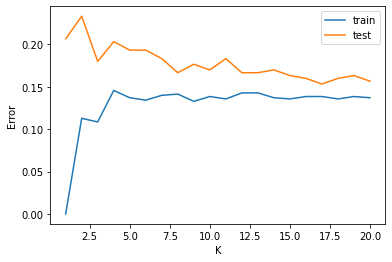

In [10]:
plt.plot( range(1,21), np.transpose(errors)[0], label='train')
plt.plot( range(1,21), np.transpose(errors)[1], label='test')
plt.xlabel("K")
plt.ylabel("Error")
plt.legend()
plt.show()

the test error decreased with k increase, matched expectations
the test not always decrease with k , for example at the graph we got we have the error increase from k=10 to k=~13



6.
we expect the error to decrease with m_train-i increase:

In [11]:
# 1.6
def build_train(train_size):
    samples = np.zeros([train_size, 3])
    for i in range(train_size):
        miu_index = 0
        rand_index = np.random.rand()
        if rand_index >= 2 / 3:
            miu_index = 2
            sample = np.random.normal(miu_two, sigma)
        elif 1 / 3 < rand_index < 2 / 3:
            miu_index = 1
            sample = np.random.normal(miu_one, sigma)
        else:
            sample = np.random.normal(miu_zero, sigma)

        samples[i] = [sample[0], sample[1], miu_index]

    data = pd.DataFrame(samples, columns=['x', 'y', 'label'])
    return data


In [12]:
error = []

new_test = build_train(100)
for i in range(10, 41, 5):
    k = 10
    data = build_train(i)
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X=data[x_cols], y=data[y_cols])
    y_train_pred = model.predict(X=data[x_cols])
    y_test_pred = model.predict(X=new_test[x_cols])

    y_train_true = data[y_cols].values
    y_test_true = new_test[y_cols].values
    train_error = np.sum(y_train_pred != y_train_true) / len(y_train_true)
    test_error = np.sum(y_test_pred != y_test_true) / len(y_test_true)
    error.append([train_error, test_error])

[[0.5, 0.64], [0.2666666666666667, 0.32999999999999996], [0.30000000000000004, 0.28], [0.040000000000000036, 0.19999999999999996], [0.19999999999999996, 0.24], [0.17142857142857137, 0.14], [0.22499999999999998, 0.18000000000000005]]


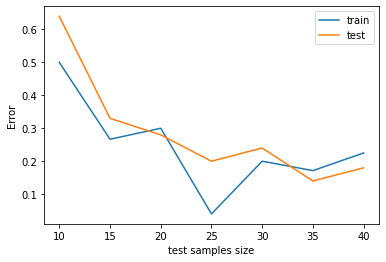

In [13]:
plt.plot( range(10, 41, 5), np.transpose(error)[0], label='train')
plt.plot( range(10, 41, 5), np.transpose(error)[1], label='test')
plt.xlabel("test samples size")
plt.ylabel("Error")
plt.legend()
plt.show()

as we expected the error was overall decreasing, but the graph was erratic due to low train size.


1.7 Yes, the plots change between the trials. Not always meet our expectations (from step 6) at every trial but the general trend is descending
1.8 We will calculate y by the weighted score of the neighbors in the following way:

y = argmax (